<a href="https://colab.research.google.com/github/agatakostrzewa/Supervised_ML/blob/main/1_2_S_ML_Housing_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating a model to predict the exact price of a house.

 In this, the second, phase of the project, the target variable will be numerical (the exact prices of the houses in dollars): we will be dealing with a regression task.

##1.Importing libraries

In [1]:
# This code block is intended to be run each time a new runtime is started in Google Colab.
# Google Colab has a pre-installed version of scikit-learn (1.0.2), but the code requires a newer version (1.2.0 or higher)
# to make use of the .set_output() method. Thus, the command to upgrade the scikit-learn package is run.
#!pip install scikit-learn --upgrade

# If you plan to run the entire notebook again during the same session,
# you can comment out the above command to avoid re-installing the package.

In [2]:
# import all necessary data

# pandas: A popular library for data manipulation and analysis
import pandas as pd

# seaborn: A data visualization library based on matplotlib
import seaborn as sns

# numpy: A library for numerical operations
import numpy as np

# SimpleImputer: A preprocessing technique to fill in missing values in datasets
from sklearn.impute import SimpleImputer

# MaxAbsScaler: Scales the features so that the training data lies within the range [-1, 1], preserving zero entries for sparse data
from sklearn.preprocessing import MaxAbsScaler

# OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler: Preprocessing methods for data transformation
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler

# DecisionTreeClassifier: A machine learning model that uses decision trees for classification tasks
from sklearn.tree import DecisionTreeClassifier

# DecisionTreeRegressor: A machine learning model that uses decision trees for regression tasks
from sklearn.tree import DecisionTreeRegressor

# LinearRegression,SGDRegressor: Linear models for regression
from sklearn.linear_model import LinearRegression, SGDRegressor

# GridSearchCV: Performs grid search with cross-validation over a parameter grid
from sklearn.model_selection import GridSearchCV

# RandomizedSearchCV: Similar to GridSearchCV, but with randomized search on hyperparameters
from sklearn.model_selection import RandomizedSearchCV

# train_test_split: A function to split datasets into training and testing subsets
from sklearn.model_selection import train_test_split

# KNeighborsRegressor: A machine learning model that implements the k-nearest neighbors algorithm for regression tasks
from sklearn.neighbors import KNeighborsRegressor

# RandomForestRegressor: An ensemble learning method that fits a number of decision tree regressors on various sub-samples of the dataset
from sklearn.ensemble import RandomForestRegressor

# mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score: Metrics for evaluating regression models
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

# accuracy_score: A function to compute the accuracy of classification models
from sklearn.metrics import accuracy_score

# make_pipeline: A function to create a composite estimator, combining different preprocessing and model steps
from sklearn.pipeline import make_pipeline

# Import necessary preprocessing techniques
from sklearn.pipeline import Pipeline

# ColumnTransformer: Applies transformers to columns of an array or pandas DataFrame
from sklearn.compose import ColumnTransformer

# Import the TransformedTargetRegressor class for target transformation
from sklearn.compose import TransformedTargetRegressor

# make_regression: A function to create a random regression problem
from sklearn.datasets import make_regression

# VarianceThreshold, SelectKBest, f_regression, RFECV, SelectFromModel: Tools for feature selection
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_regression, RFECV, SelectFromModel

# PCA: Principal Component Analysis, a technique for dimensionality reduction
from sklearn.decomposition import PCA

from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import Ridge  # for Ridge Regression

##2.Downloading a CSV file from a Google Drive and displaying the DataFrame.

In [3]:
# Define the URL of a file hosted on Google Drive
url = "https://drive.google.com/file/d/1xtD5Y0Fr5dNTuBbRkCzYMt1Jqyn_bEmA/view?usp=share_link"

# Extract the file ID from the URL and create a direct download link
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

# Read the CSV file located at the direct download link into a pandas DataFrame
Data = pd.read_csv(path)

# Create a copy of the DataFrame to work with, leaving the original unchanged
data = Data.copy()

# Print the column names of the DataFrame
data.columns

# Print the entire DataFrame
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


###2.1 Understanding the structure and content of a DataFrame.

In [4]:
# Using the 'info' method to print a concise summary of the 'data' DataFrame
# This will include information about the index dtype, column dtypes, non-null values, and memory usage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## 3.Data preparation and preprocessing.

### 3.1 Set X and y.

This code is used to prepare data for machine learning by removing unnecessary columns and separating the target variable ("SalePrice") from the feature variables. The resulting X and y would be used as inputs to a machine learning model.

In [5]:
# Drop specific columns from the DataFrame 'data' that are not needed for the analysis,
# such as "Id", "MoSold", "YrSold", "GarageYrBlt", and "GarageArea"
data = data.drop(columns=["Id","MoSold","YrSold","GarageYrBlt","GarageArea"])

# Pop the "SalePrice" column from the DataFrame 'data' and store it in the variable 'y',
# separating it as the target variable for a prediction task
y = data.pop("SalePrice")

# Store the remaining DataFrame, which now contains only the feature columns, in the variable 'X'
X = data

# Print the DataFrame 'X' to see the resulting features
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,0,NaN,NaN,NaN,0,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,0,0,NaN,NaN,NaN,0,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,0,0,NaN,NaN,NaN,0,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,272,0,0,0,NaN,NaN,NaN,0,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,0,0,NaN,NaN,NaN,0,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,0,NaN,NaN,NaN,0,WD,Normal
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,0,NaN,MnPrv,NaN,0,WD,Normal
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,0,NaN,GdPrv,Shed,2500,WD,Normal
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,112,0,0,0,NaN,NaN,NaN,0,WD,Normal


### 3.2 Adjust data types

In [6]:
#These lines of code change the data type of the specified columns to object,
#indicating that they should be treated as categorical variables.
#This is done because, despite having numerical values,
#the columns represent categories or discrete levels of some quality or condition.

# Convert the 'MSSubClass' column to the 'object' data type, treating it as a categorical variable rather than numerical
data['MSSubClass'] = data['MSSubClass'].astype('object')

# Convert the 'OverallQual' column to the 'object' data type, treating it as a categorical variable rather than numerical
data['OverallQual'] = data['OverallQual'].astype('object')

# Convert the 'OverallCond' column to the 'object' data type, treating it as a categorical variable rather than numerical
data['OverallCond'] = data['OverallCond'].astype('object')

### 3.3 Split the data

In [7]:
# Split the dataset into training and testing sets
# 80% of the data will be used for training, and 20% will be used for testing
# The random_state parameter is set to 123, ensuring that the split is reproducible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [8]:
# Select columns with non-numeric data types (i.e., categorical columns) and copy them to a new DataFrame
X_cat = X.select_dtypes(exclude="number").copy()

# Select columns with numeric data types and copy them to a new DataFrame
X_num = X.select_dtypes(include="number").copy()

# Create a numerical pipeline that fills missing values with a constant value
numeric_pipe = make_pipeline(
    SimpleImputer(strategy="constant"))

# Get the indices of columns that will be treated as ordinal categories
ordinal_cols = X_cat.columns.get_indexer(['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'KitchenQual', 'FireplaceQu', 'LotShape', 'Utilities', 'HeatingQC', 'Functional', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence'])

# Get the indices of columns that will be treated as one-hot categories
onehot_cols = X_cat.columns.get_indexer(['OverallQual', 'OverallCond', 'MSZoning', 'Condition1', 'Heating', 'Street', 'CentralAir', 'Foundation', 'MSSubClass', 'Alley', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Electrical', 'GarageType', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition'])

# Define categories for each ordinal column
ExterQual_cats = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
ExterCond_cats = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
BsmtQual_cats = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
BsmtCond_cats = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
BsmtExposure_cats = ['NA', 'No', 'Mn', 'Av', 'Gd']
BsmtFinType1_cats = ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
BsmtFinType2_cats = ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
KitchenQual_cats = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
FireplaceQu_cats = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
LotShape_cats = ['NA', 'IR3', 'IR2', 'IR1', 'Reg']
Utilities_cats = ['NA', 'ELO', 'NoSeWa', 'NoSewr', 'AllPub']
HeatingQC_cats = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
Functional_cats = ['NA', 'Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ']
GarageFinish_cats = ['NA', 'Unf', 'RFn', 'Fin']
GarageQual_cats = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
GarageCond_cats = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
PoolQC_cats = ['NA', 'Fa', 'TA', 'Gd', 'Ex']
Fence_cats = ['NA', 'MnWw', 'GdWo', 'MnPrv', 'GdPrv']

# Collect all the defined categories into one list
cats_ord = [ExterQual_cats, ExterCond_cats, BsmtQual_cats, BsmtCond_cats, BsmtExposure_cats, BsmtFinType1_cats, BsmtFinType2_cats, KitchenQual_cats, FireplaceQu_cats, LotShape_cats, Utilities_cats, HeatingQC_cats, Functional_cats, GarageFinish_cats, GarageQual_cats, GarageCond_cats, PoolQC_cats, Fence_cats]

# Define a categorical encoder using ColumnTransformer with ordinal and one-hot encoding
categorical_encoder = ColumnTransformer(
    transformers=[
        ('cat_ordinal', OrdinalEncoder(categories=cats_ord), ordinal_cols),
        ('cat_onehot', OneHotEncoder(handle_unknown='ignore'), onehot_cols)
    ]
)

# Create a categorical pipeline that fills missing values with "NA" and applies the categorical encoding
categoric_pipe = make_pipeline(
     SimpleImputer(strategy="constant", fill_value="NA"),
     categorical_encoder
     )

# Combine the numerical and categorical pipelines using ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipe", numeric_pipe, X_num.columns),
        ("cat_pipe", categoric_pipe, X_cat.columns),
    ]
)

## 4.Testing different Regression Algorithms

### 4.1 Decision Tree Regressor

This code sets up a complete machine learning pipeline, including preprocessing, feature selection, and model training. It then uses RandomizedSearchCV to perform hyperparameter tuning on the Decision Tree Regressor, searching for the best combination of hyperparameters that minimize the mean squared logarithmic error.

####4.1.1 Model training

In [9]:
# Create a full pipeline for preprocessing and model training
# It includes preprocessing the data, scaling, variance thresholding, feature selection, and training a Decision Tree Regressor
dt_pipeline = make_pipeline(preprocessor,
                              StandardScaler(),
                              VarianceThreshold(threshold=0),
                              SelectKBest(), #k=10
                              #RFECV(),
                              #SelectFromModel(treshold=None, estimator=30, prefit=True, importance_getter="auto"),
                              #SelectFromModel(estimator=DecisionTreeRegressor()),
                              #PCA(),
                              DecisionTreeRegressor(random_state=1))


# Define a parameter grid for hyperparameter tuning
# This includes various options for preprocessing, feature selection, and model training
param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median", "constant"],
    "standardscaler__with_mean": [True, False],
    "standardscaler__with_std": [True, False],
    "variancethreshold__threshold": [0, 0.01, 0.02],
    #"pca_n_compoonents": range(10, 310, 20),
    "selectkbest__k": range(5, 74, 5),
    "decisiontreeregressor__max_depth": range(2, 14, 2),
    "decisiontreeregressor__min_samples_leaf": range(3, 12, 2),
    "decisiontreeregressor__min_samples_split": range(3, 40, 5),
    "decisiontreeregressor__criterion":["squared_error", "absolute_error","friedman_mse"]
}

# Define a search method using RandomizedSearchCV
# This will perform hyperparameter tuning by trying random combinations from the parameter grid
# Randomized search is chosen over GridSearch because it is less computationally expensive
dt_search = RandomizedSearchCV(dt_pipeline,
                                 param_grid,
                                 cv=15,
                                 scoring='neg_mean_squared_log_error',
                                 #n_iter=50,
                                 #n_jobs=-2,
                                 verbose=1)


# Fit the RandomizedSearchCV object to the training data
# This will search for the best hyperparameters and train the final model on the entire training set
dt_search.fit(X_train, y_train)

Fitting 15 folds for each of 10 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local

RandomizedSearchCV(cv=15,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('num_pipe',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='constant'))]),
                                                                               Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'Gr...
                                        'decisiontreeregressor__max_depth': range(2, 14, 2),
                                        'decisiontreeregressor__min_samples_leaf': range(3, 12, 2),
                                        'decisiontreeregressor__min_samples_split': range(3, 40, 5),
                                        'selectkbest__k': range(5, 74, 5),
                                        'standardscaler__with_mean': [True,
                                                                      False],
                                        'standardscaler__with_std': [True,
                                                                     False],
                                        'variancethreshold__threshold': [0,
                                                                         0.01,
                                                                         0.02]},
                   scoring='neg_mean_squared_log_error', verbose=1)

In [10]:
# Get the best hyperparameters found by RandomizedSearchCV
dt_search.best_params_

{'variancethreshold__threshold': 0.01,
 'standardscaler__with_std': False,
 'standardscaler__with_mean': False,
 'selectkbest__k': 20,
 'decisiontreeregressor__min_samples_split': 3,
 'decisiontreeregressor__min_samples_leaf': 7,
 'decisiontreeregressor__max_depth': 10,
 'decisiontreeregressor__criterion': 'absolute_error',
 'columntransformer__num_pipe__simpleimputer__strategy': 'median'}

In [11]:
# Get the best score obtained by RandomizedSearchCV
dt_search.best_score_

-0.039961359834264853

#### 4.1.2 Prediction

In [12]:
# Using the RandomizedSearchCV object (dt_search), which has been previously trained,
# predict the target variable for the training data (X_train) using the best found parameters and estimator.
dt_search.predict(X_train)

array([313500., 189000., 272000., ..., 240000., 130750., 128000.])

In [13]:
# Using the RandomizedSearchCV object (dt_search), which has been previously trained,
# predict the target variable for the testing data (X_test) using the best found parameters and estimator.
# The predictions are stored in the variable dt_predictions.
dt_predictions = dt_search.predict(X_test)

In [14]:
dt_predictions

array([219500. , 180000. , 237500. , 200000. , 139950. , 240000. ,
       340000. , 129500. , 139475. , 129000. , 155500. , 201000. ,
       145000. , 129500. , 242000. , 143000. , 132000. , 280000. ,
       216700. , 146500. , 145000. , 186500. ,  92950. , 157750. ,
       201000. , 153500. , 180500. , 184000. , 121500. , 139475. ,
       146500. , 189000. , 129000. , 163250. , 280000. , 192500. ,
       163250. , 426000. , 168892.5,  60000. , 121500. , 240000. ,
       146500. , 163250. , 221000. , 122300. , 280000. , 237500. ,
       275250. , 111000. , 215000. , 202500. , 129000. , 163000. ,
       133250. , 143000. , 119000. , 160450. , 275000. , 377426. ,
        92950. , 320000. , 139950. , 163000. , 237500. , 135000. ,
       115000. , 240000. , 220000. , 145000. , 145000. , 237500. ,
       164500. , 255000. , 145250. , 135000. , 179665. , 128500. ,
       201000. , 100000. , 280000. , 377426. ,  60000. , 157900. ,
       146500. , 140000. ,  94000. , 119000. ,  81000. , 21500

####4.1.3 Error Calculation and creation of new variables for model comparison.

* Mean Absolute Error (MAE)
$$MAE = \frac{1}{n}\sum_{i=1}^{n} |y_{i} - y_{e}|$$
* Root Mean Squared Error (RMSE):
$$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_{i} - y_{e})^{2}}$$
* Mean Absolute Percentage Error (MAPE)

$$MAPE = \frac{1}{n}\sum_{i=1}^{n} |\frac{y_{i} - y_{e}}{y_{i}}|$$

* R2-score

Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). In the general case when the true y is non-constant, a constant model that always predicts the average y disregarding the input features would get a score of 0.0.

In [15]:
# errors overview for the DecisionTreeRegressor Method

# Calculate the Mean Absolute Error between the actual and predicted values for the test set
dt_mae = mean_absolute_error(y_true =y_test, y_pred = dt_predictions)

# Calculate the Root Mean Squared Error between the actual and predicted values for the test set
dt_rmse = mean_squared_error(y_true =y_test, y_pred = dt_predictions, squared=False)

# Calculate the Mean Absolute Percentage Error between the actual and predicted values for the test set
dt_mape = mean_absolute_percentage_error(y_true =y_test, y_pred = dt_predictions)

# Calculate the R-squared score to measure how well the predicted values match the actual values in the test set
dt_r2 = r2_score(y_true =y_test, y_pred = dt_predictions)

In [16]:
# errors overview for the VarianceThreshold Method

# Calculate the Mean Absolute Error between the actual and predicted values for the test set using the VarianceThreshold Method
dt_var_mae = mean_absolute_error(y_true =y_test, y_pred = dt_predictions)

# Calculate the Root Mean Squared Error between the actual and predicted values for the test set using the VarianceThreshold Method
dt_var_rmse = mean_squared_error(y_true =y_test, y_pred = dt_predictions, squared=False)

# Calculate the Mean Absolute Percentage Error between the actual and predicted values for the test set using the VarianceThreshold Method
dt_var_mape = mean_absolute_percentage_error(y_true =y_test, y_pred = dt_predictions)

# Calculate the R-squared score to measure how well the predicted values match the actual values in the test set using the VarianceThreshold Method
dt_var_r2 = r2_score(y_true =y_test, y_pred = dt_predictions)


In [17]:
# errors overview for the SelectKBest Method

# Calculate the Mean Absolute Error between the actual and predicted values for the test set using the SelectKBest Method
dt_k_mae = mean_absolute_error(y_true =y_test, y_pred = dt_predictions)

# Calculate the Root Mean Squared Error between the actual and predicted values for the test set using the SelectKBest Method
dt_k_rmse = mean_squared_error(y_true =y_test, y_pred = dt_predictions, squared=False)

# Calculate the Mean Absolute Percentage Error between the actual and predicted values for the test set using the SelectKBest Method
dt_k_mape = mean_absolute_percentage_error(y_true =y_test, y_pred = dt_predictions)

# Calculate the R-squared score to measure how well the predicted values match the actual values in the test set using the SelectKBest Method
dt_k_r2 = r2_score(y_true =y_test, y_pred = dt_predictions)


#### 4.1.4 COMPETITION

In [18]:
# Define the URL pointing to a Google Drive file
url = "https://drive.google.com/file/d/15PfmTxmavQCT-f7iY9tgwWxm9t4GRees/view?usp=share_link"

# Extract the file ID from the URL and construct the direct download link
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

# Read the CSV file located at the constructed path into a Pandas DataFrame called 'Data_comp'
Data_comp = pd.read_csv(path)

# Make a copy of the DataFrame 'Data_comp' and store it in 'data_comp'
data_comp = Data_comp.copy()

# Print the column names of the 'data_comp' DataFrame
data_comp.columns

# Print the entire 'data_comp' DataFrame
data_comp

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,MSZoning,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,11622,80.0,882.0,2,0,0,1.0,140,120,RH,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1,14267,81.0,1329.0,3,0,0,1.0,393,0,RL,...,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
2,13830,74.0,928.0,3,1,0,2.0,212,0,RL,...,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
3,9978,78.0,926.0,3,1,0,2.0,360,0,RL,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,5005,43.0,1280.0,2,0,0,2.0,0,144,RL,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1936,21.0,546.0,3,0,0,0.0,0,0,RM,...,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,WD,Normal
1455,1894,21.0,546.0,3,0,0,1.0,0,0,RM,...,CarPort,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
1456,20000,160.0,1224.0,4,1,0,2.0,474,0,RL,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
1457,10441,62.0,912.0,3,0,0,0.0,80,0,RL,...,NaN,NaN,NaN,NaN,Y,NaN,MnPrv,Shed,WD,Normal


In [19]:
# Drop the specified columns ("MoSold", "YrSold", "GarageYrBlt", "GarageArea") from the 'data_comp' DataFrame and assign the resulting DataFrame back to 'data_comp'
data_comp = data_comp.drop(columns=["MoSold","YrSold","GarageYrBlt","GarageArea"])

In [20]:
# Change the data type of the 'MSSubClass' column to 'object' (string or mixed types) in the 'data_comp' DataFrame
data_comp['MSSubClass'] = data_comp['MSSubClass'].astype('object')

# Change the data type of the 'OverallQual' column to 'object' in the 'data_comp' DataFrame
data_comp['OverallQual'] = data_comp['OverallQual'].astype('object')

# Change the data type of the 'OverallCond' column to 'object' in the 'data_comp' DataFrame
data_comp['OverallCond'] = data_comp['OverallCond'].astype('object')


In [21]:
# Remove the 'Id' column from the 'data_comp' DataFrame and store it in the variable 'id_comp'
id_comp = data_comp.pop('Id')

# Assign the updated 'data_comp' DataFrame (after removing the 'Id' column) to the variable 'X_test_comp'
X_test_comp = data_comp

In [22]:
# Use the previously trained Decision Tree model (contained within 'dt_search') to predict the values on the 'X_test_comp' dataset, storing the results in 'y_test_pred'
y_test_pred = dt_search.predict(X_test_comp)

In [23]:
# Print or access the predicted values for the test dataset 'X_test_comp' that were computed in the previous step
y_test_pred

array([119000., 157900., 180500., ..., 140000., 116500., 196500.])

In [24]:
# Create a new DataFrame 'my_comp_df_DTR' using the 'id_comp' variable as the first column
# Add a new column 'SalePrice' to the DataFrame and assign the predicted values 'y_test_pred' to it
# The resulting DataFrame will contain the IDs alongside the corresponding predicted sale prices
my_comp_df_DTR = pd.DataFrame(id_comp)
my_comp_df_DTR['SalePrice'] = y_test_pred
my_comp_df_DTR

,Id,SalePrice
0,1461,119000.0
1,1462,157900.0
2,1463,180500.0
3,1464,189000.0
4,1465,220000.0
...,...,...
1454,2915,84750.0
1455,2916,84750.0
1456,2917,140000.0
1457,2918,116500.0


In [25]:
# Save the 'my_comp_df_DTR' DataFrame to a CSV file named 'my_comp_df_kaggle_DTR.csv'
# The 'index = False' parameter ensures that the index of the DataFrame is not saved in the CSV file
my_comp_df_DTR.to_csv('my_comp_df_kaggle_DTR.csv', index = False)

In [26]:
from google.colab import files
files.download('my_comp_df_kaggle_DTR.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##### Result

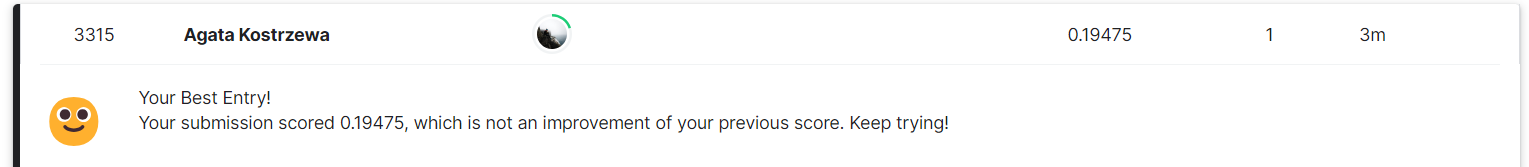

### 4.2 Linear Regression Regressor

This code outlines the creation of a pipeline for a linear regression model with preprocessing, scaling, feature selection, and hyperparameter tuning using RandomizedSearchCV. It's a standard approach for structuring a machine learning model and its associated preprocessing and tuning tasks.

####4.2.1 Model training

In [27]:
# Creating a full pipeline for the linear regression model
# The pipeline includes preprocessing steps, scaling, variance thresholding, feature selection, and the Linear Regression model itself

# 1. `preprocessor`: This is presumably an earlier-defined preprocessing step that might include tasks such as encoding categorical variables, imputing missing values, etc.
# 2. `StandardScaler()`: Standardizes features by removing the mean and scaling to unit variance
# 3. `VarianceThreshold(threshold=0)`: Removes features with variance less than the given threshold (0 in this case)
# 4. `SelectKBest()`: Selects the top K features based on their scores from a scoring function (e.g., ANOVA F-value between label/feature)
# 5. `LinearRegression()`: Linear regression model
linreg_pipeline = make_pipeline(preprocessor,
                                StandardScaler(),
                                VarianceThreshold(threshold=0),
                                SelectKBest(),
                                LinearRegression())

# Defining a parameter grid to search through
# The grid includes different strategies for the numerical imputer, mean and standard deviation scaling options, variance threshold values, number of top features to select, and whether to calculate the intercept for the linear regression
param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy": ["mean", "median", "constant"],
    "standardscaler__with_mean": [True, False],
    "standardscaler__with_std": [True, False],
    "variancethreshold__threshold": [0, 0.01, 0.02],
    "selectkbest__k": range(5, 74, 5),
    "linearregression__fit_intercept": [True, False]
}

# Defining a random search method using the pipeline and parameter grid
# It utilizes 15-fold cross-validation and aims to minimize the mean squared logarithmic error (neg_mean_squared_log_error)
# `verbose=1` controls the verbosity of the output (higher values give more details)
linreg_search = RandomizedSearchCV(linreg_pipeline,
                                   param_grid,
                                   cv=15,
                                   scoring='neg_mean_squared_log_error',
                                   verbose=1)

# Fitting the random search to the training data (X_train, y_train)
# This will perform the search over the parameter grid and fit the best model to the training data
linreg_search.fit(X_train, y_train)

Fitting 15 folds for each of 10 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local

RandomizedSearchCV(cv=15,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('num_pipe',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='constant'))]),
                                                                               Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'Gr...
                   param_distributions={'columntransformer__num_pipe__simpleimputer__strategy': ['mean',
                                                                                                 'median',
                                                                                                 'constant'],
                                        'linearregression__fit_intercept': [True,
                                                                            False],
                                        'selectkbest__k': range(5, 74, 5),
                                        'standardscaler__with_mean': [True,
                                                                      False],
                                        'standardscaler__with_std': [True,
                                                                     False],
                                        'variancethreshold__threshold': [0,
                                                                         0.01,
                                                                         0.02]},
                   scoring='neg_mean_squared_log_error', verbose=1)

In [28]:
# Retrieve the best hyperparameters that were found during the hyperparameter search for the Linear Regression pipeline.
linreg_search.best_params_

{'variancethreshold__threshold': 0,
 'standardscaler__with_std': False,
 'standardscaler__with_mean': False,
 'selectkbest__k': 60,
 'linearregression__fit_intercept': False,
 'columntransformer__num_pipe__simpleimputer__strategy': 'median'}

In [29]:
# Retrieve the best score (negative mean squared log error) achieved during the hyperparameter search for the Linear Regression pipeline.
linreg_search.best_score_

-0.03084034322788111

####4.2.2 Prediction

In [30]:
# Use the best-fit Linear Regression model to predict the training data, 'X_train'.
linreg_search.predict(X_train)

array([336624.39443322, 174934.73280596, 239879.08835264, ...,
       220361.54121774, 132145.19357866, 142242.36814026])

In [31]:
# Predict the target variable (e.g., SalePrice) for the test dataset using the trained Linear Regression model within the RandomizedSearchCV
linreg_predictions = linreg_search.predict(X_test)

In [32]:
# Using the fitted Linear Regression model within the RandomizedSearchCV to predict the target variable on a new test dataset (X_test_comp)
y_test_pred = linreg_search.predict(X_test_comp)

####4.2.3 Error Calculation and creation of new variables for model comparison.

In [33]:
# errors overview for the Linear Regression Method

# Calculating the Mean Absolute Error between the true test outcomes and the predictions from the Linear Regression model
lr_mae = mean_absolute_error(y_true=y_test, y_pred=linreg_predictions)

# Calculating the Root Mean Squared Error between the true test outcomes and the predictions from the Linear Regression model
lr_rmse = mean_squared_error(y_true=y_test, y_pred=linreg_predictions, squared=False)

# Calculating the Mean Absolute Percentage Error between the true test outcomes and the predictions from the Linear Regression model
lr_mape = mean_absolute_percentage_error(y_true=y_test, y_pred=linreg_predictions)

# Calculating the R-squared (coefficient of determination) between the true test outcomes and the predictions from the Linear Regression model
lr_r2 = r2_score(y_true=y_test, y_pred=linreg_predictions)


In [34]:
# errors overview for the VarianceThreshold Method

# Calculating the Mean Absolute Error for the Linear Regression model after applying VarianceThreshold
lr_var_mae = mean_absolute_error(y_true=y_test, y_pred=linreg_predictions)

# Calculating the Root Mean Squared Error for the Linear Regression model after applying VarianceThreshold
lr_var_rmse = mean_squared_error(y_true=y_test, y_pred=linreg_predictions, squared=False)

# Calculating the Mean Absolute Percentage Error for the Linear Regression model after applying VarianceThreshold
lr_var_mape = mean_absolute_percentage_error(y_true=y_test, y_pred=linreg_predictions)

# Calculating the R-squared (coefficient of determination) for the Linear Regression model after applying VarianceThreshold
lr_var_r2 = r2_score(y_true=y_test, y_pred=linreg_predictions)

In [35]:
# errors overview for the SelectKBest Method

# Calculating the Mean Absolute Error for the Linear Regression model after applying SelectKBest
lr_k_mae = mean_absolute_error(y_true=y_test, y_pred=linreg_predictions)

# Calculating the Root Mean Squared Error for the Linear Regression model after applying SelectKBest
lr_k_rmse = mean_squared_error(y_true=y_test, y_pred=linreg_predictions, squared=False)

# Calculating the Mean Absolute Percentage Error for the Linear Regression model after applying SelectKBest
lr_k_mape = mean_absolute_percentage_error(y_true=y_test, y_pred=linreg_predictions)

# Calculating the R-squared (coefficient of determination) for the Linear Regression model after applying SelectKBest
lr_k_r2 = r2_score(y_true=y_test, y_pred=linreg_predictions)

####4.2.4 COMPETITION

In [36]:
# Creating a DataFrame 'my_comp_df_lr' that consists of the 'id_comp' series
my_comp_df_lr = pd.DataFrame(id_comp)

# Adding a new column 'SalePrice' to 'my_comp_df_lr' and assigning the predicted values from 'y_test_pred' to it
my_comp_df_lr['SalePrice'] = y_test_pred

# Printing the 'my_comp_df_lr' DataFrame to visualize the structure
my_comp_df_lr

,Id,SalePrice
0,1461,106554.567723
1,1462,169125.831448
2,1463,178488.412887
3,1464,183896.900232
4,1465,233581.494319
...,...,...
1454,2915,82585.565276
1455,2916,87223.014107
1456,2917,150587.407147
1457,2918,118402.985406


In [37]:
# Save the DataFrame 'my_comp_df_lr' to a CSV file named 'my_comp_df_kaggle_2.csv' without writing the row numbers (index)
my_comp_df_lr.to_csv('my_comp_df_kaggle_LRR.csv', index = False)

In [38]:
from google.colab import files
files.download('my_comp_df_kaggle_LRR.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#####Result

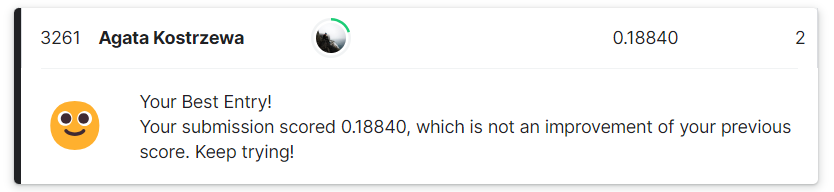

###LR 2 with Polynomial Features

Linear Regression assumes a linear relationship between features and the target variable. By introducing polynomial features, you can capture more complex relationships in the data. You can do this by adding the PolynomialFeatures transformer to your pipeline before the Linear Regression model. This will generate polynomial features up to a specified degree.

####Model training

In [39]:
poly_linreg_pipeline = make_pipeline(preprocessor,
                                     StandardScaler(),
                                     VarianceThreshold(threshold=0),
                                     SelectKBest(),
                                     PolynomialFeatures(),
                                     LinearRegression())

param_grid_poly = {
    "columntransformer__num_pipe__simpleimputer__strategy": ["mean", "median", "constant"],
    "standardscaler__with_mean": [True, False],
    "standardscaler__with_std": [True, False],
    "variancethreshold__threshold": [0, 0.01, 0.02],
    "selectkbest__k": range(5, 74, 5),
    "polynomialfeatures__degree": [1, 2, 3],  # Experiment with the degree
    "linearregression__fit_intercept": [True, False]
}

poly_linreg_search = RandomizedSearchCV(poly_linreg_pipeline,
                                        param_grid_poly,
                                        cv=20,
                                        scoring='neg_mean_squared_log_error',
                                        verbose=1)

poly_linreg_search.fit(X_train, y_train)

Fitting 20 folds for each of 10 candidates, totalling 200 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py", line 525, in mean_squared_log_error
    raise ValueError(
ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_sele

RandomizedSearchCV(cv=20,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('num_pipe',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='constant'))]),
                                                                               Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'Gr...
                   param_distributions={'columntransformer__num_pipe__simpleimputer__strategy': ['mean',
                                                                                                 'median',
                                                                                                 'constant'],
                                        'linearregression__fit_intercept': [True,
                                                                            False],
                                        'polynomialfeatures__degree': [1, 2, 3],
                                        'selectkbest__k': range(5, 74, 5),
                                        'standardscaler__with_mean': [True,
                                                                      False],
                                        'standardscaler__with_std': [True,
                                                                     False],
                                        'variancethreshold__threshold': [0,
                                                                         0.01,
                                                                         0.02]},
                   scoring='neg_mean_squared_log_error', verbose=1)

In [40]:
# Retrieve the best hyperparameters that were found during the hyperparameter search for the Linear Regression pipeline.
poly_linreg_search.best_params_

{'variancethreshold__threshold': 0.02,
 'standardscaler__with_std': False,
 'standardscaler__with_mean': False,
 'selectkbest__k': 65,
 'polynomialfeatures__degree': 1,
 'linearregression__fit_intercept': False,
 'columntransformer__num_pipe__simpleimputer__strategy': 'mean'}

In [41]:
# Retrieve the best score (negative mean squared log error) achieved during the hyperparameter search for the Linear Regression pipeline.
poly_linreg_search.best_score_

-0.030925810815759402

####Prediction

In [42]:
# Use the best-fit Linear Regression model to predict the training data, 'X_train'.
poly_linreg_search.predict(X_train)

array([337207.86210422, 195562.90598543, 241312.37902767, ...,
       215318.82924619, 131131.25217075, 137260.5759939 ])

In [43]:
# Predict the target variable (e.g., SalePrice) for the test dataset using the trained Linear Regression model within the RandomizedSearchCV
poly_linreg_predictions = poly_linreg_search.predict(X_test)

In [44]:
# Using the fitted Linear Regression model within the RandomizedSearchCV to predict the target variable on a new test dataset (X_test_comp)
y_test_pred = poly_linreg_search.predict(X_test_comp)

####COMPETITION

In [45]:
# Creating a DataFrame 'my_comp_df_lr' that consists of the 'id_comp' series
my_comp_df_lr2 = pd.DataFrame(id_comp)

# Adding a new column 'SalePrice' to 'my_comp_df_lr' and assigning the predicted values from 'y_test_pred' to it
my_comp_df_lr2['SalePrice'] = y_test_pred

# Printing the 'my_comp_df_lr' DataFrame to visualize the structure
my_comp_df_lr2

,Id,SalePrice
0,1461,107384.835374
1,1462,147834.294926
2,1463,179949.607002
3,1464,181025.585123
4,1465,196137.947765
...,...,...
1454,2915,70510.036111
1455,2916,73041.757656
1456,2917,151912.569457
1457,2918,125279.389627


In [46]:
# Save the DataFrame 'my_comp_df_lr' to a CSV file named 'my_comp_df_kaggle_2.csv' without writing the row numbers (index)
my_comp_df_lr2.to_csv('my_comp_df_kaggle_LR2.csv', index = False)

In [47]:
from google.colab import files
files.download('my_comp_df_kaggle_LR2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###LR 3 with Regularization (Ridge)

Linear Regression can suffer from overfitting if there are many features or multicollinearity. Ridge and Lasso regression are regularization techniques that can help mitigate this. They add a penalty term to the loss function, discouraging large coefficient values. Ridge tends to work well when most features are relevant, while Lasso can perform feature selection by setting some coefficients to zero.

####Model training

In [48]:
ridge_pipeline = make_pipeline(preprocessor,
                               StandardScaler(),
                               VarianceThreshold(threshold=0),
                               SelectKBest(),
                               Ridge(alpha=0.1))  # Experiment with the alpha value

param_grid_ridge = {
    "columntransformer__num_pipe__simpleimputer__strategy": ["mean", "median", "constant"],
    "standardscaler__with_mean": [True, False],
    "standardscaler__with_std": [True, False],
    "variancethreshold__threshold": [0, 0.01, 0.02],
    "selectkbest__k": range(5, 74, 5),
    "ridge__alpha": [0.001, 0.01, 0.1, 1, 10],  # Experiment with alpha values
    "ridge__fit_intercept": [True, False]
}

ridge_search = RandomizedSearchCV(ridge_pipeline,
                                  param_grid_ridge,
                                  cv=15,
                                  scoring='neg_mean_squared_log_error',
                                  verbose=1)

ridge_search.fit(X_train, y_train)

Fitting 15 folds for each of 10 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local

RandomizedSearchCV(cv=15,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('num_pipe',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='constant'))]),
                                                                               Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'Gr...
                   param_distributions={'columntransformer__num_pipe__simpleimputer__strategy': ['mean',
                                                                                                 'median',
                                                                                                 'constant'],
                                        'ridge__alpha': [0.001, 0.01, 0.1, 1,
                                                         10],
                                        'ridge__fit_intercept': [True, False],
                                        'selectkbest__k': range(5, 74, 5),
                                        'standardscaler__with_mean': [True,
                                                                      False],
                                        'standardscaler__with_std': [True,
                                                                     False],
                                        'variancethreshold__threshold': [0,
                                                                         0.01,
                                                                         0.02]},
                   scoring='neg_mean_squared_log_error', verbose=1)

In [49]:
# Retrieve the best hyperparameters that were found during the hyperparameter search for the Linear Regression pipeline.
ridge_search.best_params_

{'variancethreshold__threshold': 0.02,
 'standardscaler__with_std': False,
 'standardscaler__with_mean': False,
 'selectkbest__k': 55,
 'ridge__fit_intercept': False,
 'ridge__alpha': 10,
 'columntransformer__num_pipe__simpleimputer__strategy': 'constant'}

In [50]:
# Retrieve the best score (negative mean squared log error) achieved during the hyperparameter search for the Linear Regression pipeline.
ridge_search.best_score_

-0.05369228166325902

####Prediction

In [51]:
# Use the best-fit Linear Regression model to predict the training data, 'X_train'.
ridge_search.predict(X_train)

array([297573.0797939 , 180977.84991219, 329920.15458415, ...,
       243003.04523174, 104860.07780058, 136617.72924645])

In [52]:
# Predict the target variable (e.g., SalePrice) for the test dataset using the trained Linear Regression model within the RandomizedSearchCV
ridge_predictions = ridge_search.predict(X_test)

In [53]:
# Using the fitted Linear Regression model within the RandomizedSearchCV to predict the target variable on a new test dataset (X_test_comp)
y_test_pred = ridge_search.predict(X_test_comp)

####COMPETITION

In [54]:
# Creating a DataFrame 'my_comp_df_lr' that consists of the 'id_comp' series
my_comp_df_lr3 = pd.DataFrame(id_comp)

# Adding a new column 'SalePrice' to 'my_comp_df_lr' and assigning the predicted values from 'y_test_pred' to it
my_comp_df_lr3['SalePrice'] = y_test_pred

# Printing the 'my_comp_df_lr' DataFrame to visualize the structure
my_comp_df_lr3

,Id,SalePrice
0,1461,122990.727606
1,1462,170159.033874
2,1463,187067.470295
3,1464,182866.905118
4,1465,170046.831022
...,...,...
1454,2915,113804.407019
1455,2916,119124.428199
1456,2917,169448.190629
1457,2918,129455.616540


In [55]:
# Save the DataFrame 'my_comp_df_lr' to a CSV file named 'my_comp_df_kaggle_2.csv' without writing the row numbers (index)
my_comp_df_lr3.to_csv('my_comp_df_kaggle_LR3.csv', index = False)

In [56]:
from google.colab import files
files.download('my_comp_df_kaggle_LR3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###LR 4 with Polynomial Features and Ridge

####Model training

In [57]:
poly_ridge_pipeline = make_pipeline(preprocessor,
                                    StandardScaler(),
                                    VarianceThreshold(threshold=0),
                                    SelectKBest(),
                                    PolynomialFeatures(),
                                    Ridge())

# Defining a parameter grid to search through

param_grid_poly_ridge = {
    "columntransformer__num_pipe__simpleimputer__strategy": ["mean", "median", "constant"],
    "standardscaler__with_mean": [True, False],
    "standardscaler__with_std": [True, False],
    "variancethreshold__threshold": [0, 0.01, 0.02],
    "selectkbest__k": range(5, 74, 5),
    "polynomialfeatures__degree": [1, 2, 3],
    "ridge__alpha": [0.001, 0.01, 0.1, 1, 10],
    "ridge__fit_intercept": [True, False]
}

# Defining a random search method using the combined pipeline and parameter grid
poly_ridge_search = RandomizedSearchCV(poly_ridge_pipeline,
                                       param_grid_poly_ridge,
                                       cv=15,
                                       scoring='neg_mean_squared_log_error',
                                       verbose=1)

# Fitting the random search to the training data (X_train, y_train)
poly_ridge_search.fit(X_train, y_train)

Fitting 15 folds for each of 10 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local

RandomizedSearchCV(cv=15,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('num_pipe',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='constant'))]),
                                                                               Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'Gr...
                   param_distributions={'columntransformer__num_pipe__simpleimputer__strategy': ['mean',
                                                                                                 'median',
                                                                                                 'constant'],
                                        'polynomialfeatures__degree': [1, 2, 3],
                                        'ridge__alpha': [0.001, 0.01, 0.1, 1,
                                                         10],
                                        'ridge__fit_intercept': [True, False],
                                        'selectkbest__k': range(5, 74, 5),
                                        'standardscaler__with_mean': [True,
                                                                      False],
                                        'standardscaler__with_std': [True,
                                                                     False],
                                        'variancethreshold__threshold': [0,
                                                                         0.01,
                                                                         0.02]},
                   scoring='neg_mean_squared_log_error', verbose=1)

In [58]:
# Retrieve the best hyperparameters that were found during the hyperparameter search for the Linear Regression pipeline.
poly_ridge_search.best_params_

{'variancethreshold__threshold': 0.02,
 'standardscaler__with_std': True,
 'standardscaler__with_mean': False,
 'selectkbest__k': 60,
 'ridge__fit_intercept': False,
 'ridge__alpha': 0.01,
 'polynomialfeatures__degree': 1,
 'columntransformer__num_pipe__simpleimputer__strategy': 'median'}

In [59]:
# Retrieve the best score (negative mean squared log error) achieved during the hyperparameter search for the Linear Regression pipeline.
poly_ridge_search.best_score_

-0.033315983290908215

####Prediction

In [60]:
# Use the best-fit Linear Regression model to predict the training data, 'X_train'.
poly_ridge_search.predict(X_train)

array([327491.75790975, 169328.1454867 , 232853.62949027, ...,
       214497.06610301, 132775.7744497 , 137991.62884285])

In [61]:
# Predict the target variable (e.g., SalePrice) for the test dataset using the trained Linear Regression model within the RandomizedSearchCV
poly_ridge_predictions = poly_ridge_search.predict(X_test)

In [62]:
# Using the fitted Linear Regression model within the RandomizedSearchCV to predict the target variable on a new test dataset (X_test_comp)
y_test_pred = poly_ridge_search.predict(X_test_comp)

####COMPETITION

In [63]:
# Creating a DataFrame 'my_comp_df_lr' that consists of the 'id_comp' series
my_comp_df_lr4 = pd.DataFrame(id_comp)

# Adding a new column 'SalePrice' to 'my_comp_df_lr' and assigning the predicted values from 'y_test_pred' to it
my_comp_df_lr4['SalePrice'] = y_test_pred

# Printing the 'my_comp_df_lr' DataFrame to visualize the structure
my_comp_df_lr4

,Id,SalePrice
0,1461,105728.171833
1,1462,159357.881123
2,1463,179897.140266
3,1464,183713.318744
4,1465,232563.294189
...,...,...
1454,2915,83972.528170
1455,2916,82928.854142
1456,2917,150787.852658
1457,2918,116999.938812


In [64]:
# Save the DataFrame 'my_comp_df_lr' to a CSV file named 'my_comp_df_kaggle_2.csv' without writing the row numbers (index)
my_comp_df_lr4.to_csv('my_comp_df_kaggle_LR4.csv', index = False)

In [65]:
from google.colab import files
files.download('my_comp_df_kaggle_LR4.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###4.3 SGD Regressor

The code sets up a machine learning pipeline using stochastic gradient descent regression and includes preprocessing steps like standardization, variance thresholding, and feature selection. The hyperparameters are then tuned using randomized search (an alternative to grid search that can be faster), and the model is trained on the provided training data (X_train, y_train).

####4.3.1 Model training

In [66]:
# Create a pipeline for processing the features
# This includes preprocessing of the input data, scaling using MaxAbsScaler (suitable for sparse data),
# thresholding variance, and selecting the best features based on univariate tests
feature_pipeline = make_pipeline(preprocessor,
                              MaxAbsScaler(),
                              VarianceThreshold(threshold=0),
                              SelectKBest(score_func=f_regression))

# Create a TransformedTargetRegressor that uses MinMaxScaler to transform the target variable (y)
# This ensures that the target variable is scaled to a specific range, preserving the relative distances between values
model_with_target_transformation = TransformedTargetRegressor(regressor=SGDRegressor(random_state=1),
                                                              transformer=MinMaxScaler())

# Combine the feature processing pipeline with the target transformation into a single pipeline
# This allows for consistent application of transformations to both features and target throughout training and prediction
sgd_pipeline = Pipeline([
    ('features', feature_pipeline),
    ('regressor', model_with_target_transformation)
])

# Define a grid of hyperparameters for tuning the model
# This includes strategies for imputing missing values, thresholds for variance filtering, and the number of top features to select
param_grid = {
    "features__columntransformer__num_pipe__simpleimputer__strategy": ["mean", "median", "constant"],
    "features__variancethreshold__threshold": [0, 0.01, 0.02],
    "features__selectkbest__k": range(5, 85, 5),
}

# Define a RandomizedSearchCV object to perform hyperparameter tuning
# This will search over the defined parameter grid using 5-fold cross-validation and mean squared log error as the scoring metric
sgd_search = RandomizedSearchCV(sgd_pipeline,
                                param_grid,
                                cv=5,
                                scoring='neg_mean_squared_log_error',
                                random_state=2,
                                verbose=1)

# Fit the pipeline to the training data
# This will find the best hyperparameters based on the defined search and fit the final model to the full training data
sgd_search.fit(X_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('features',
                                              Pipeline(steps=[('columntransformer',
                                                               ColumnTransformer(transformers=[('num_pipe',
                                                                                                Pipeline(steps=[('simpleimputer',
                                                                                                                 SimpleImputer(strategy='constant'))]),
                                                                                                Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2...
                                              TransformedTargetRegressor(regressor=SGDRegressor(random_state=1),
                                                                         transformer=MinMaxScaler()))]),
                   param_distributions={'features__columntransformer__num_pipe__simpleimputer__strategy': ['mean',
                                                                                                           'median',
                                                                                                           'constant'],
                                        'features__selectkbest__k': range(5, 85, 5),
                                        'features__variancethreshold__threshold': [0,
                                                                                   0.01,
                                                                                   0.02]},
                   random_state=2, scoring='neg_mean_squared_log_error',
                   verbose=1)

In [67]:
# Retrieve and print the best hyperparameters found by the RandomizedSearchCV during the search for the SGD Regressor model
sgd_search.best_params_

{'features__variancethreshold__threshold': 0,
 'features__selectkbest__k': 70,
 'features__columntransformer__num_pipe__simpleimputer__strategy': 'constant'}

In [68]:
# Retrieve and print the best score (negative mean squared log error) achieved by the RandomizedSearchCV for the SGD Regressor model
sgd_search.best_score_

-0.03554096278683047

####4.3.2 Prediction

In [69]:
# Generate predictions using the trained SGD model on the training data
sgd_search.predict(X_train)

array([285994.71226611, 172744.45129102, 234325.73056414, ...,
       205028.86418803, 134829.55166278, 151813.0268248 ])

In [70]:
# Generate predictions using the trained SGD model on the test data
sgd_predictions = sgd_search.predict(X_test)

In [71]:
# Using the fitted SGD model within the RandomizedSearchCV to predict the target variable on a new test dataset (X_test_comp)
y_test_pred = sgd_search.predict(X_test_comp)

####4.3.3 Error Calculation and creation of new variables for model comparison.

In [72]:
# Errors overview for the SGD Model

# Calculating the Mean Absolute Error (MAE) between the true test outcomes and the predictions from the SGD model
sgd_mae = mean_absolute_error(y_true=y_test, y_pred=sgd_predictions)

# Calculating the Root Mean Squared Error (RMSE) between the true test outcomes and the predictions from the SGD model
sgd_rmse = mean_squared_error(y_true=y_test, y_pred=sgd_predictions, squared=False)

# Calculating the Mean Absolute Percentage Error (MAPE) between the true test outcomes and the predictions from the SGD model
sgd_mape = mean_absolute_percentage_error(y_true=y_test, y_pred=sgd_predictions)

# Calculating the R-squared (coefficient of determination) between the true test outcomes and the predictions from the SGD model
sgd_r2 = r2_score(y_true=y_test, y_pred=sgd_predictions)

In [73]:
# Errors overview for the VarianceThreshold Method

# Calculating the Mean Absolute Error (MAE) between the true test outcomes and the predictions from the SGD model with VarianceThreshold
sgd_var_mae = mean_absolute_error(y_true=y_test, y_pred=sgd_predictions)

# Calculating the Root Mean Squared Error (RMSE) between the true test outcomes and the predictions from the SGD model with VarianceThreshold
sgd_var_rmse = mean_squared_error(y_true=y_test, y_pred=sgd_predictions, squared=False)

# Calculating the Mean Absolute Percentage Error (MAPE) between the true test outcomes and the predictions from the SGD model with VarianceThreshold
sgd_var_mape = mean_absolute_percentage_error(y_true=y_test, y_pred=sgd_predictions)

# Calculating the R-squared (coefficient of determination) between the true test outcomes and the predictions from the SGD model with VarianceThreshold
sgd_var_r2 = r2_score(y_true=y_test, y_pred=sgd_predictions)


In [74]:
# Errors overview for the SelectKBest Method

# Calculating the Mean Absolute Error (MAE) between the true test outcomes and the predictions from the SGD model with SelectKBest
sgd_k_mae = mean_absolute_error(y_true=y_test, y_pred=sgd_predictions)

# Calculating the Root Mean Squared Error (RMSE) between the true test outcomes and the predictions from the SGD model with SelectKBest
sgd_k_rmse = mean_squared_error(y_true=y_test, y_pred=sgd_predictions, squared=False)

# Calculating the Mean Absolute Percentage Error (MAPE) between the true test outcomes and the predictions from the SGD model with SelectKBest
sgd_k_mape = mean_absolute_percentage_error(y_true=y_test, y_pred=sgd_predictions)

# Calculating the R-squared (coefficient of determination) between the true test outcomes and the predictions from the SGD model with SelectKBest
sgd_k_r2 = r2_score(y_true=y_test, y_pred=sgd_predictions)


####4.3.4 COMPETITION

In [75]:
# Creating a DataFrame 'my_comp_df_sgd' that consists of the 'id_comp' series
my_comp_df_sgd = pd.DataFrame(id_comp)

# Adding a new column 'SalePrice' to 'my_comp_df_sgd' and assigning the predicted values from 'y_test_pred' to it
my_comp_df_sgd['SalePrice'] = y_test_pred

# Printing the 'my_comp_df_sgd' DataFrame to visualize the structure
my_comp_df_sgd

,Id,SalePrice
0,1461,89173.056306
1,1462,160976.920708
2,1463,203085.772740
3,1464,229832.766178
4,1465,208998.147578
...,...,...
1454,2915,80877.493979
1455,2916,96542.888215
1456,2917,152535.657597
1457,2918,132717.292525


In [76]:
# Save the DataFrame 'my_comp_df_sgd' to a CSV file named 'my_comp_df_kaggle_SGD.csv' without writing the row numbers (index)
my_comp_df_sgd.to_csv('my_comp_df_kaggle_SGD.csv', index = False)

In [77]:
from google.colab import files
files.download('my_comp_df_kaggle_SGD.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#####Result

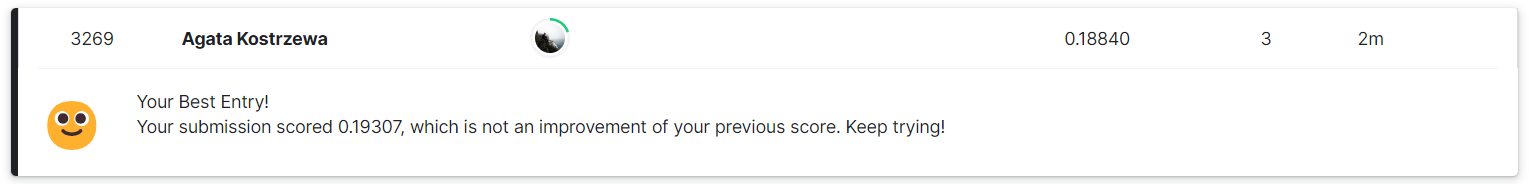

### 4.4 KNN Regressor with RandomizedSearchCV


This code sets up a machine learning pipeline with the KNeighborsRegressor algorithm for regression tasks. It involves preprocessing, standardization, variance thresholding, and feature selection. Hyperparameters are optimized using randomized search, and the model is trained on provided training data (X_train, y_train).

####4.4.1 Model training

In [78]:
# Creating a pipeline incorporating preprocessing, standardization, variance thresholding, feature selection, and KNeighborsRegressor
knn_pipeline = make_pipeline(preprocessor,
                              StandardScaler(),
                              VarianceThreshold(threshold=0),
                              SelectKBest(score_func=f_regression), #k=10
                              KNeighborsRegressor())

# Defining a parameter grid for hyperparameter tuning
param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy":["mean", "median", "constant"],
    "standardscaler__with_mean": [True, False],
    "standardscaler__with_std": [True, False],
    "selectkbest__k": range(10, 100, 10),
    "kneighborsregressor__n_neighbors": range(2, 40),
    "kneighborsregressor__p": [1, 2, np.inf, 3],
    "kneighborsregressor__weights": ["uniform", "distance"],
}

# Defining a randomized search method for hyperparameter optimization
knn_search = RandomizedSearchCV(knn_pipeline,
                                 param_grid,
                                 cv=40,
                                 scoring='neg_mean_squared_log_error',
                                 random_state=2,
                                 n_iter=200,
                                 #n_jobs=-2,
                                 verbose=1)

# Fitting the model to the training data using the randomized search
knn_search.fit(X_train, y_train)

Fitting 40 folds for each of 200 candidates, totalling 8000 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5880 fits failed out of a total of 8000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3760 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.10/di

RandomizedSearchCV(cv=40,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('num_pipe',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='constant'))]),
                                                                               Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'Gr...
                   param_distributions={'columntransformer__num_pipe__simpleimputer__strategy': ['mean',
                                                                                                 'median',
                                                                                                 'constant'],
                                        'kneighborsregressor__n_neighbors': range(2, 40),
                                        'kneighborsregressor__p': [1, 2, inf,
                                                                   3],
                                        'kneighborsregressor__weights': ['uniform',
                                                                         'distance'],
                                        'selectkbest__k': range(10, 100, 10),
                                        'standardscaler__with_mean': [True,
                                                                      False],
                                        'standardscaler__with_std': [True,
                                                                     False]},
                   random_state=2, scoring='neg_mean_squared_log_error',
                   verbose=1)

In [79]:
# Retrieve the best hyperparameters found during the RandomizedSearchCV
knn_search.best_params_

{'standardscaler__with_std': True,
 'standardscaler__with_mean': False,
 'selectkbest__k': 90,
 'kneighborsregressor__weights': 'uniform',
 'kneighborsregressor__p': 1,
 'kneighborsregressor__n_neighbors': 4,
 'columntransformer__num_pipe__simpleimputer__strategy': 'median'}

In [80]:
# Get the best mean squared log error score achieved by the model during RandomizedSearchCV
knn_search.best_score_

-0.028185431951145024

#### 4.4.2 Prediction

In [81]:
# Making predictions on the training data using the trained KNeighborsRegressor model
knn_search.predict(X_train)

array([294000. , 161225. , 249250. , ..., 225287.5, 130325. , 136350. ])

In [82]:
# Making predictions on the test data using the trained KNeighborsRegressor model
knn_predictions = knn_search.predict(X_test)

In [83]:
# Using the fitted KNN model within the RandomizedSearchCV to predict the target variable on a new test dataset (X_test_comp)
y_test_pred = knn_search.predict(X_test_comp)

####4.4.3 Error Calculation and creation of new variables for model comparison.

In [84]:
# Errors overview for the KNN Model

# Calculating the Mean Absolute Error (MAE) between the true test outcomes and the predictions from the KNN model
knn_mae = mean_absolute_error(y_true=y_test, y_pred=knn_predictions)

# Calculating the Root Mean Squared Error (RMSE) between the true test outcomes and the predictions from the KNN model
knn_rmse = mean_squared_error(y_true=y_test, y_pred=knn_predictions, squared=False)

# Calculating the Mean Absolute Percentage Error (MAPE) between the true test outcomes and the predictions from the KNN model
knn_mape = mean_absolute_percentage_error(y_true=y_test, y_pred=knn_predictions)

# Calculating the R-squared (coefficient of determination) between the true test outcomes and the predictions from the SGD model
knn_r2 = r2_score(y_true=y_test, y_pred=knn_predictions)

In [85]:
# Errors overview for the VarianceThreshold Method

# Calculating the Mean Absolute Error (MAE) between the true test outcomes and the predictions from the KNN model with VarianceThreshold
knn_var_mae = mean_absolute_error(y_true=y_test, y_pred=knn_predictions)

# Calculating the Root Mean Squared Error (RMSE) between the true test outcomes and the predictions from the KNN model with VarianceThreshold
knn_var_rmse = mean_squared_error(y_true=y_test, y_pred=knn_predictions, squared=False)

# Calculating the Mean Absolute Percentage Error (MAPE) between the true test outcomes and the predictions from the KNN model with VarianceThreshold
knn_var_mape = mean_absolute_percentage_error(y_true=y_test, y_pred=knn_predictions)

# Calculating the R-squared (coefficient of determination) between the true test outcomes and the predictions from the KNN model with VarianceThreshold
knn_var_r2 = r2_score(y_true=y_test, y_pred=knn_predictions)

In [86]:
# Errors overview for the SelectKBest Method

# Calculating the Mean Absolute Error (MAE) between the true test outcomes and the predictions from the KNN model with SelectKBest
knn_k_mae = mean_absolute_error(y_true=y_test, y_pred=knn_predictions)

# Calculating the Root Mean Squared Error (RMSE) between the true test outcomes and the predictions from the KNN model with SelectKBest
knn_k_rmse = mean_squared_error(y_true=y_test, y_pred=knn_predictions, squared=False)

# Calculating the Mean Absolute Percentage Error (MAPE) between the true test outcomes and the predictions from the KNN model with SelectKBest
knn_k_mape = mean_absolute_percentage_error(y_true=y_test, y_pred=knn_predictions)

# Calculating the R-squared (coefficient of determination) between the true test outcomes and the predictions from the SGD model with SelectKBest
knn_k_r2 = r2_score(y_true=y_test, y_pred=knn_predictions)

####4.4.4 COMPETITION

In [87]:
# Creating a DataFrame 'my_comp_df_knn' that consists of the 'id_comp' series
my_comp_df_knn = pd.DataFrame(id_comp)

# Adding a new column 'SalePrice' to 'my_comp_df_knn' and assigning the predicted values from 'y_test_pred' to it
my_comp_df_knn['SalePrice'] = y_test_pred

# Printing the 'my_comp_df_knn' DataFrame to visualize the structure
my_comp_df_knn

,Id,SalePrice
0,1461,124362.5
1,1462,148187.5
2,1463,197375.0
3,1464,196875.0
4,1465,204750.0
...,...,...
1454,2915,84500.0
1455,2916,83625.0
1456,2917,121850.0
1457,2918,103400.0


In [88]:
# Save the DataFrame 'my_comp_df_knn' to a CSV file named 'my_comp_df_kaggle_KNN.csv' without writing the row numbers (index)
my_comp_df_knn.to_csv('my_comp_df_kaggle_KNN.csv', index = False)

In [89]:
from google.colab import files
files.download('my_comp_df_kaggle_KNN.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##### Result

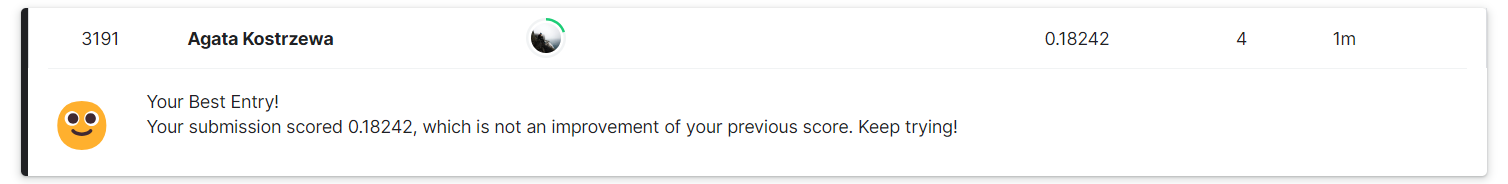

###4.5 KNN Regressor with GridSearchCV

####4.5.1 Model training

In [90]:
# Creating a pipeline incorporating preprocessing, standardization, variance thresholding, feature selection, and KNeighborsRegressor
knn2_pipeline = make_pipeline(preprocessor,
                              StandardScaler(),
                              VarianceThreshold(threshold=0),
                              SelectKBest(score_func=f_regression), #k=10
                              KNeighborsRegressor())

# Defining a parameter grid for hyperparameter tuning
param_grid_knn2 = {
    "columntransformer__num_pipe__simpleimputer__strategy": ["mean", "median", "constant"],
    "standardscaler__with_mean": [True, False],
    "standardscaler__with_std": [True, False],
    "selectkbest__k": range(5, 100, 5),
    #"kneighborsregressor__leaf_size": range(10, 80, 10),
    "kneighborsregressor__n_neighbors": range(2, 10),
    "kneighborsregressor__p": [1, 2, np.inf, 3],
    "kneighborsregressor__weights": ["uniform", "distance"],
}

# Defining a grid search method for hyperparameter optimization
knn2_search = GridSearchCV(knn2_pipeline,
                           param_grid_knn2,
                           cv=5,
                           scoring='neg_mean_squared_log_error',
                           verbose=1)

# Fitting the model to the training data using the grid search
knn2_search.fit(X_train, y_train)

Fitting 5 folds for each of 14592 candidates, totalling 72960 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
54720 fits failed out of a total of 72960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36480 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/usr/local/lib/python3.10

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='constant'))]),
                                                                         Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea...
             param_grid={'columntransformer__num_pipe__simpleimputer__strategy': ['mean',
                                                                                  'median',
                                                                                  'constant'],
                         'kneighborsregressor__n_neighbors': range(2, 10),
                         'kneighborsregressor__p': [1, 2, inf, 3],
                         'kneighborsregressor__weights': ['uniform',
                                                          'distance'],
                         'selectkbest__k': range(5, 100, 5),
                         'standardscaler__with_mean': [True, False],
                         'standardscaler__with_std': [True, False]},
             scoring='neg_mean_squared_log_error', verbose=1)

In [91]:
# Retrieve the best hyperparameters found during the GridSearchCV
knn2_search.best_params_

{'columntransformer__num_pipe__simpleimputer__strategy': 'median',
 'kneighborsregressor__n_neighbors': 6,
 'kneighborsregressor__p': 1,
 'kneighborsregressor__weights': 'distance',
 'selectkbest__k': 95,
 'standardscaler__with_mean': False,
 'standardscaler__with_std': True}

In [92]:
# Get the best mean squared log error score achieved by the model during GridSearchCV
knn2_search.best_score_

-0.027436479032896043

####4.5.2 Prediction

In [93]:
# Making predictions on the training data using the trained KNeighborsRegressor model
knn2_search.predict(X_train)

array([260000., 181900., 272000., ..., 262500., 133000., 131000.])

In [94]:
# Making predictions on the test data using the trained KNeighborsRegressor model
knn2_predictions = knn2_search.predict(X_test)

In [95]:
# Using the fitted KNN model 2 within the GridSearchCV to predict the target variable on a new test dataset (X_test_comp)
y_test_pred = knn2_search.predict(X_test_comp)

####4.5.3 Error Calculation and creation of new variables for model comparison.

In [96]:
# Errors overview for the KNN Model 2

# Calculating the Mean Absolute Error (MAE) between the true test outcomes and the predictions from the KNN model
knn2_mae = mean_absolute_error(y_true=y_test, y_pred=knn2_predictions)

# Calculating the Root Mean Squared Error (RMSE) between the true test outcomes and the predictions from the KNN model
knn2_rmse = mean_squared_error(y_true=y_test, y_pred=knn2_predictions, squared=False)

# Calculating the Mean Absolute Percentage Error (MAPE) between the true test outcomes and the predictions from the KNN model
knn2_mape = mean_absolute_percentage_error(y_true=y_test, y_pred=knn2_predictions)

# Calculating the R-squared (coefficient of determination) between the true test outcomes and the predictions from the SGD model
knn2_r2 = r2_score(y_true=y_test, y_pred=knn2_predictions)

In [97]:
# Errors overview for the VarianceThreshold Method

# Calculating the Mean Absolute Error (MAE) between the true test outcomes and the predictions from the KNN model with VarianceThreshold
knn2_var_mae = mean_absolute_error(y_true=y_test, y_pred=knn2_predictions)

# Calculating the Root Mean Squared Error (RMSE) between the true test outcomes and the predictions from the KNN model with VarianceThreshold
knn2_var_rmse = mean_squared_error(y_true=y_test, y_pred=knn2_predictions, squared=False)

# Calculating the Mean Absolute Percentage Error (MAPE) between the true test outcomes and the predictions from the KNN model with VarianceThreshold
knn2_var_mape = mean_absolute_percentage_error(y_true=y_test, y_pred=knn2_predictions)

# Calculating the R-squared (coefficient of determination) between the true test outcomes and the predictions from the KNN model with VarianceThreshold
knn2_var_r2 = r2_score(y_true=y_test, y_pred=knn2_predictions)

In [98]:
# Errors overview for the SelectKBest Method

# Calculating the Mean Absolute Error (MAE) between the true test outcomes and the predictions from the KNN model with SelectKBest
knn2_k_mae = mean_absolute_error(y_true=y_test, y_pred=knn2_predictions)

# Calculating the Root Mean Squared Error (RMSE) between the true test outcomes and the predictions from the KNN model with SelectKBest
knn2_k_rmse = mean_squared_error(y_true=y_test, y_pred=knn2_predictions, squared=False)

# Calculating the Mean Absolute Percentage Error (MAPE) between the true test outcomes and the predictions from the KNN model with SelectKBest
knn2_k_mape = mean_absolute_percentage_error(y_true=y_test, y_pred=knn2_predictions)

# Calculating the R-squared (coefficient of determination) between the true test outcomes and the predictions from the SGD model with SelectKBest
knn2_k_r2 = r2_score(y_true=y_test, y_pred=knn2_predictions)

####4.5.4 COMPETITION

In [99]:
# Creating a DataFrame 'my_comp_df_knn' that consists of the 'id_comp' series
my_comp_df_knn2 = pd.DataFrame(id_comp)

# Adding a new column 'SalePrice' to 'my_comp_df_knn' and assigning the predicted values from 'y_test_pred' to it
my_comp_df_knn2['SalePrice'] = y_test_pred

# Printing the 'my_comp_df_knn' DataFrame to visualize the structure
my_comp_df_knn2

,Id,SalePrice
0,1461,126634.075387
1,1462,150312.560243
2,1463,191148.887224
3,1464,198451.781691
4,1465,202824.122174
...,...,...
1454,2915,86114.715671
1455,2916,90395.636440
1456,2917,130433.458685
1457,2918,108526.669184


In [100]:
# Save the DataFrame 'my_comp_df_knn2' to a CSV file named 'my_comp_df_kaggle_KNN2.csv' without writing the row numbers (index)
my_comp_df_knn2.to_csv('my_comp_df_kaggle_KNN2.csv', index = False)

In [101]:
from google.colab import files
files.download('my_comp_df_kaggle_KNN2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#####Result

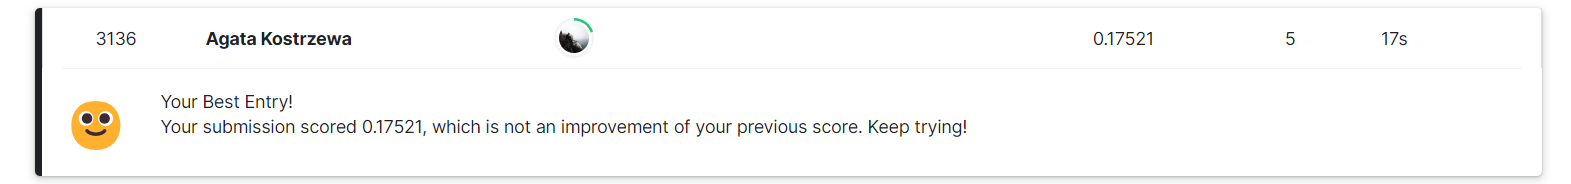

###4.6 Random Forest

###4.6.1 First attempt

####4.6.1.1 Model training

In [102]:
# Create a pipeline for processing the features
# This includes preprocessing of the input data, scaling using StandardScaler (with_mean=False to avoid centering sparse matrix),
# thresholding variance, and selecting the best features based on univariate tests
rf_pipeline = make_pipeline(preprocessor,
                             StandardScaler(with_mean=False), # Avoid centering sparse matrix
                             VarianceThreshold(threshold=0),
                             SelectKBest(), # Default score_func=f_classif for classification
                             RandomForestRegressor(random_state=42)) # Random Forest Regressor with fixed random state

# Define a parameter grid for hyperparameter tuning
param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy": ["mean", "median", "constant"], # Strategies for imputation
    "variancethreshold__threshold": [0, 0.01, 0.02], # Thresholds for variance filtering
    "selectkbest__k": range(5, 74, 5), # Number of top features to select
    "randomforestregressor__n_estimators": [100, 200, 300], # Number of trees in the forest
    "randomforestregressor__max_depth": [5, 10, 15], # Maximum depth of the trees
    "randomforestregressor__min_samples_split": [2, 5, 10], # Minimum number of samples required to split an internal node
    "randomforestregressor__min_samples_leaf": [1, 2, 4], # Minimum number of samples required to be at a leaf node
}

# Define the search method
# RandomizedSearchCV performs random search over the parameter grid with cross-validation
rf_search = RandomizedSearchCV(rf_pipeline,
                               param_grid,
                               cv=15, # 15-fold cross-validation
                               scoring='neg_mean_squared_log_error', # Scoring metric
                               verbose=1) # Show progress

# Fit the data to perform hyperparameter tuning and train the model
rf_search.fit(X_train, y_train)

Fitting 15 folds for each of 10 candidates, totalling 150 fits


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local

RandomizedSearchCV(cv=15,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('num_pipe',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='constant'))]),
                                                                               Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'Gr...
                   param_distributions={'columntransformer__num_pipe__simpleimputer__strategy': ['mean',
                                                                                                 'median',
                                                                                                 'constant'],
                                        'randomforestregressor__max_depth': [5,
                                                                             10,
                                                                             15],
                                        'randomforestregressor__min_samples_leaf': [1,
                                                                                    2,
                                                                                    4],
                                        'randomforestregressor__min_samples_split': [2,
                                                                                     5,
                                                                                     10],
                                        'randomforestregressor__n_estimators': [100,
                                                                                200,
                                                                                300],
                                        'selectkbest__k': range(5, 74, 5),
                                        'variancethreshold__threshold': [0,
                                                                         0.01,
                                                                         0.02]},
                   scoring='neg_mean_squared_log_error', verbose=1)

In [103]:
rf_search.best_params_

{'variancethreshold__threshold': 0.02,
 'selectkbest__k': 60,
 'randomforestregressor__n_estimators': 200,
 'randomforestregressor__min_samples_split': 10,
 'randomforestregressor__min_samples_leaf': 1,
 'randomforestregressor__max_depth': 10,
 'columntransformer__num_pipe__simpleimputer__strategy': 'constant'}

In [104]:
rf_search.best_score_

-0.02766079397452024

####4.6.1.2 Prediction

In [105]:
rf_search.predict(X_train)

array([285991.38186718, 173706.56388805, 245241.84974552, ...,
       240929.15101302, 129265.93017677, 124307.29975578])

In [106]:
rf_predictions = rf_search.predict(X_test)

In [107]:
y_test_pred = rf_search.predict(X_test_comp)

####4.6.1.3 COMPETITION

In [108]:
my_comp_df_rf = pd.DataFrame(id_comp)
my_comp_df_rf['SalePrice'] = y_test_pred
my_comp_df_rf

,Id,SalePrice
0,1461,117806.183544
1,1462,145720.014353
2,1463,187421.178174
3,1464,183544.418934
4,1465,198918.709672
...,...,...
1454,2915,86943.258008
1455,2916,87512.290952
1456,2917,153368.446270
1457,2918,118506.485307


In [109]:
my_comp_df_rf.to_csv('my_comp_df_kaggle_rf.csv', index = False)

In [110]:
from google.colab import files
files.download('my_comp_df_kaggle_rf.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#####Result

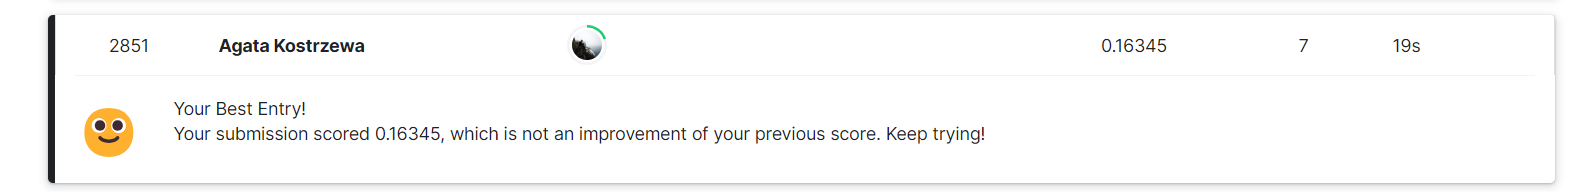

###4.6.2 Second attempt

####4.6.2.1 Model training

In [111]:
# Creating a pipeline for the Random Forest model
rf2_pipeline = make_pipeline(preprocessor,
                             StandardScaler(with_mean=False), # set with_mean=False to avoid centering sparse matrix
                             VarianceThreshold(threshold=0),
                             SelectKBest(),
                             RandomForestRegressor(random_state=42))

# Defining a parameter grid with limited options for faster tuning
param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy": ["mean", "median"],
    "variancethreshold__threshold": [0, 0.01],
    "selectkbest__k": range(5, 50, 5),
    "randomforestregressor__n_estimators": [100, 200],
    "randomforestregressor__max_depth": [5, 10],
}

# Using fewer CV folds for faster evaluation
rf2_search = RandomizedSearchCV(rf_pipeline,
                               param_grid,
                               cv=5,
                               scoring='neg_mean_squared_log_error',
                               verbose=1)

# Fit the data
rf2_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('num_pipe',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='constant'))]),
                                                                               Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrL...
                                             ('randomforestregressor',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'columntransformer__num_pipe__simpleimputer__strategy': ['mean',
                                                                                                 'median'],
                                        'randomforestregressor__max_depth': [5,
                                                                             10],
                                        'randomforestregressor__n_estimators': [100,
                                                                                200],
                                        'selectkbest__k': range(5, 50, 5),
                                        'variancethreshold__threshold': [0,
                                                                         0.01]},
                   scoring='neg_mean_squared_log_error', verbose=1)

In [112]:
rf2_search.best_params_

{'variancethreshold__threshold': 0,
 'selectkbest__k': 40,
 'randomforestregressor__n_estimators': 200,
 'randomforestregressor__max_depth': 10,
 'columntransformer__num_pipe__simpleimputer__strategy': 'median'}

In [113]:
rf2_search.best_score_

-0.03120228216303092

####4.6.2.2 Prediction

In [114]:
rf2_search.predict(X_train)

array([280033.4601721 , 174453.34168913, 246077.42931287, ...,
       239646.58013379, 125190.74862713, 121107.28092696])

In [115]:
rf2_predictions = rf_search.predict(X_test)

In [116]:
y_test_pred = rf2_search.predict(X_test_comp)

####4.6.2.3 COMPETITION

In [117]:
my_comp_df_rf2 = pd.DataFrame(id_comp)
my_comp_df_rf2['SalePrice'] = y_test_pred
my_comp_df_rf2

,Id,SalePrice
0,1461,121651.906907
1,1462,145826.190935
2,1463,183361.875418
3,1464,188219.623388
4,1465,194298.515027
...,...,...
1454,2915,86625.342291
1455,2916,89231.768294
1456,2917,153040.133650
1457,2918,115147.203200


In [118]:
my_comp_df_rf2.to_csv('my_comp_df_kaggle_rf2.csv', index = False)

In [119]:
from google.colab import files
files.download('my_comp_df_kaggle_rf2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#####Result

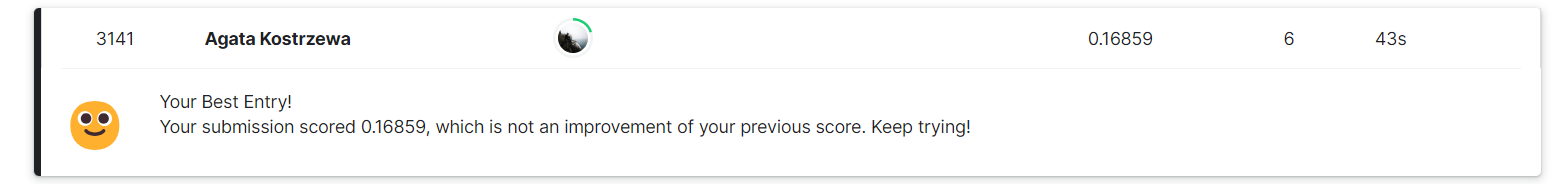

###4.6.3 Third attempt

####4.6.3.1 Model training

In [120]:
# Creating a pipeline for the Random Forest model
rf3_pipeline = make_pipeline(preprocessor,
                             StandardScaler(with_mean=False), # set with_mean=False to avoid centering sparse matrix
                             VarianceThreshold(threshold=0),
                             SelectKBest(),
                             RandomForestRegressor(random_state=42))

# Defining a parameter grid for hyperparameter tuning
param_grid = {
    "columntransformer__num_pipe__simpleimputer__strategy": ["mean", "median"],
    "variancethreshold__threshold": [0, 0.01],
    "selectkbest__k": range(10, 61, 10),  # Experiment with a larger k range
    "randomforestregressor__n_estimators": [200, 300, 400],  # Increase the number of trees
    "randomforestregressor__max_depth": [None, 10, 20],  # Allowing deeper trees
    "randomforestregressor__min_samples_split": [2, 5],  # Experiment with min_samples_split
    "randomforestregressor__min_samples_leaf": [1, 2, 4],
}

# Using more CV folds for better accuracy assessment
rf3_search = RandomizedSearchCV(rf_pipeline,
                               param_grid,
                               cv=10,
                               scoring='neg_mean_squared_log_error',
                               n_iter=100,  # Increase the number of iterations for a wider search
                               verbose=1)

# Fit the data
rf3_search.fit(X_train, y_train)


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('num_pipe',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='constant'))]),
                                                                               Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'Gr...
                   param_distributions={'columntransformer__num_pipe__simpleimputer__strategy': ['mean',
                                                                                                 'median'],
                                        'randomforestregressor__max_depth': [None,
                                                                             10,
                                                                             20],
                                        'randomforestregressor__min_samples_leaf': [1,
                                                                                    2,
                                                                                    4],
                                        'randomforestregressor__min_samples_split': [2,
                                                                                     5],
                                        'randomforestregressor__n_estimators': [200,
                                                                                300,
                                                                                400],
                                        'selectkbest__k': range(10, 61, 10),
                                        'variancethreshold__threshold': [0,
                                                                         0.01]},
                   scoring='neg_mean_squared_log_error', verbose=1)

In [121]:
rf3_search.best_params_

{'variancethreshold__threshold': 0.01,
 'selectkbest__k': 60,
 'randomforestregressor__n_estimators': 400,
 'randomforestregressor__min_samples_split': 2,
 'randomforestregressor__min_samples_leaf': 1,
 'randomforestregressor__max_depth': 20,
 'columntransformer__num_pipe__simpleimputer__strategy': 'median'}

In [122]:
rf3_search.best_score_

-0.026941828674250858

####4.6.3.2 Prediction

In [123]:
rf3_search.predict(X_train)

array([274791.14      , 177940.06083333, 252068.315     , ...,
       248941.5       , 131700.60833333, 127275.50958333])

In [124]:
rf3_predictions = rf_search.predict(X_test)

In [125]:
y_test_pred = rf3_search.predict(X_test_comp)

####4.6.3.3 Error Calculation and creation of new variables for model comparison.

The only error calculation for Random Forest as it has the best results of all 3 attempts

In [126]:
# Errors overview for the rf3

# Calculating the Mean Absolute Error (MAE) between the true test outcomes and the predictions from the KNN model
rf3_mae = mean_absolute_error(y_true=y_test, y_pred=rf3_predictions)

# Calculating the Root Mean Squared Error (RMSE) between the true test outcomes and the predictions from the KNN model
rf3_rmse = mean_squared_error(y_true=y_test, y_pred=rf3_predictions, squared=False)

# Calculating the Mean Absolute Percentage Error (MAPE) between the true test outcomes and the predictions from the KNN model
rf3_mape = mean_absolute_percentage_error(y_true=y_test, y_pred=rf3_predictions)

# Calculating the R-squared (coefficient of determination) between the true test outcomes and the predictions from the SGD model
rf3_r2 = r2_score(y_true=y_test, y_pred=rf3_predictions)

In [127]:
# Errors overview for the VarianceThreshold Method

# Calculating the Mean Absolute Error (MAE) between the true test outcomes and the predictions from the KNN model with VarianceThreshold
rf3_var_mae = mean_absolute_error(y_true=y_test, y_pred=rf3_predictions)

# Calculating the Root Mean Squared Error (RMSE) between the true test outcomes and the predictions from the KNN model with VarianceThreshold
rf3_var_rmse = mean_squared_error(y_true=y_test, y_pred=rf3_predictions, squared=False)

# Calculating the Mean Absolute Percentage Error (MAPE) between the true test outcomes and the predictions from the KNN model with VarianceThreshold
rf3_var_mape = mean_absolute_percentage_error(y_true=y_test, y_pred=rf3_predictions)

# Calculating the R-squared (coefficient of determination) between the true test outcomes and the predictions from the KNN model with VarianceThreshold
rf3_var_r2 = r2_score(y_true=y_test, y_pred=rf3_predictions)

In [128]:
# Errors overview for the SelectKBest Method

# Calculating the Mean Absolute Error (MAE) between the true test outcomes and the predictions from the KNN model with SelectKBest
rf3_k_mae = mean_absolute_error(y_true=y_test, y_pred=rf3_predictions)

# Calculating the Root Mean Squared Error (RMSE) between the true test outcomes and the predictions from the KNN model with SelectKBest
rf3_k_rmse = mean_squared_error(y_true=y_test, y_pred=rf3_predictions, squared=False)

# Calculating the Mean Absolute Percentage Error (MAPE) between the true test outcomes and the predictions from the KNN model with SelectKBest
rf3_k_mape = mean_absolute_percentage_error(y_true=y_test, y_pred=rf3_predictions)

# Calculating the R-squared (coefficient of determination) between the true test outcomes and the predictions from the SGD model with SelectKBest
rf3_k_r2 = r2_score(y_true=y_test, y_pred=rf3_predictions)

####4.6.3.3 COMPETITION

In [129]:
my_comp_df_rf3 = pd.DataFrame(id_comp)
my_comp_df_rf3['SalePrice'] = y_test_pred
my_comp_df_rf3

,Id,SalePrice
0,1461,117882.287635
1,1462,145241.001111
2,1463,186065.697381
3,1464,182807.958333
4,1465,193406.375691
...,...,...
1454,2915,84888.704597
1455,2916,86949.823645
1456,2917,154838.713333
1457,2918,116001.752500


In [130]:
my_comp_df_rf3.to_csv('my_comp_df_kaggle_rf3.csv', index = False)

In [131]:
from google.colab import files
files.download('my_comp_df_kaggle_rf3.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#####Result


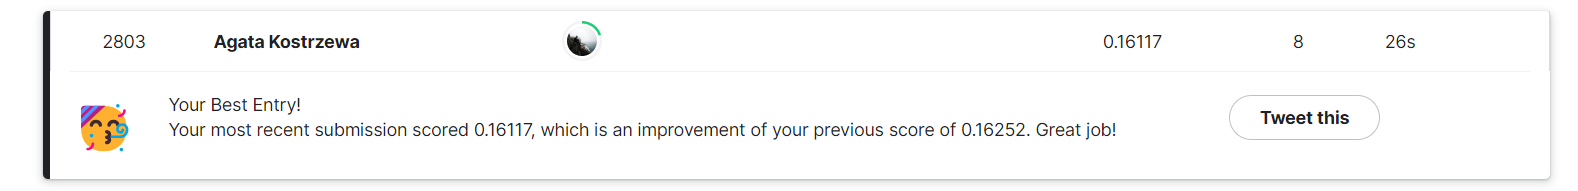

##5. Compare models

### 5.1 Without feature selection

In [133]:
comparing_models_df = pd.DataFrame({"MAE": [dt_mae, sgd_mae, lr_mae, knn_mae, knn2_mae, rf3_mae],
                                    "RMSE": [dt_rmse, sgd_rmse, lr_rmse, knn_rmse, knn2_rmse, rf3_rmse],
                                    "MAPE": [dt_mape, sgd_mape, lr_mape, knn_mape, knn2_mape, rf3_k_mae],
                                    "R2": [dt_r2, sgd_r2, lr_r2, knn_r2, knn2_r2, rf3_r2]},
                                    index=["decision_tree", "sgd", "linear_regression", "knn", "knn2", "random_forest"])
comparing_models_df

,MAE,RMSE,MAPE,R2
decision_tree,23663.352740,37320.256593,0.139414,0.774614
sgd,25037.901254,39028.314252,0.139733,0.753511
linear_regression,20089.491840,30175.193725,0.114782,0.852654
knn,21589.380137,34626.157544,0.118860,0.805980
knn2,20462.339943,32897.348267,0.114121,0.824870
random_forest,17697.579560,27664.877445,17697.579560,0.876150


###5.2 With Variance Threshold

In [136]:
comparing_models_var_df = pd.DataFrame({"MAE": [dt_var_mae, sgd_var_mae, lr_var_mae, knn_var_mae, knn2_var_mae, rf3_var_mae],
                                        "RMSE": [dt_var_rmse, sgd_var_rmse, lr_var_rmse, knn_var_rmse, knn2_var_rmse, rf3_var_rmse],
                                        "MAPE": [dt_var_mape, sgd_var_mape, lr_var_mape, knn_var_mape, knn2_var_mape, rf3_var_mape],
                                        "R2": [dt_var_r2, sgd_var_r2, lr_var_r2, knn_var_r2, knn2_var_r2, rf3_var_r2]},
                                        index=["decision_tree", "sgd", "linear_regression", "knn", "knn2", "random_forest"])
comparing_models_var_df

,MAE,RMSE,MAPE,R2
decision_tree,23663.352740,37320.256593,0.139414,0.774614
sgd,25037.901254,39028.314252,0.139733,0.753511
linear_regression,20089.491840,30175.193725,0.114782,0.852654
knn,21589.380137,34626.157544,0.118860,0.805980
knn2,20462.339943,32897.348267,0.114121,0.824870
random_forest,17697.579560,27664.877445,0.102646,0.876150


### 5.3 With KBest

In [137]:
comparing_models_k_df = pd.DataFrame({"MAE": [dt_k_mae, sgd_k_mae, lr_k_mae, knn_k_mae, knn2_k_mae, rf3_k_mae],
                                      "RMSE": [dt_k_rmse, sgd_k_rmse, lr_k_rmse, knn_k_rmse, knn2_k_rmse, rf3_k_rmse],
                                      "MAPE": [dt_k_mape, sgd_k_mape, lr_k_mape, knn_k_mape, knn2_k_mape, rf3_k_mape],
                                      "R2": [dt_k_r2, sgd_k_r2, lr_k_r2, knn_k_r2, knn2_k_r2, rf3_k_r2]},
                                      index=["decision_tree", "sgd", "linear_regression", "knn", "knn2", "random_forest"])
comparing_models_k_df

,MAE,RMSE,MAPE,R2
decision_tree,23663.352740,37320.256593,0.139414,0.774614
sgd,25037.901254,39028.314252,0.139733,0.753511
linear_regression,20089.491840,30175.193725,0.114782,0.852654
knn,21589.380137,34626.157544,0.118860,0.805980
knn2,20462.339943,32897.348267,0.114121,0.824870
random_forest,17697.579560,27664.877445,0.102646,0.876150


##6. Conclusion

Random forest model 3 (rf3) Performed the best in Kaggle competition.

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview